# Statistics for Data Science with Python Peer-Graded Assignment

## Project Scenario <br>
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following. <br>
<br>
Is there a significant difference in the median value of houses bounded by the Charles river or not?
Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## Dataset Variable Descriptions (Task 1 - Become Familar with the Dataset) <br>
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in K-USD



## Import Libraries Load Dataset (Task 3 - Load in Dataset to Your Jupyter Notebook)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Display Sample Dataset

In [2]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Descriptive Statistics and Visualizations (Task 4 - Generate Descriptive Statistics and Visualizations)

### For the "Median value of owner-occupied homes" provide a boxplot

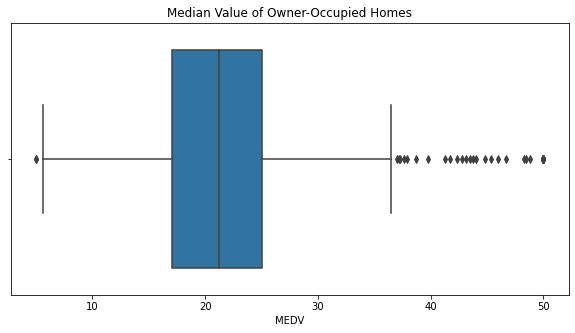

In [3]:
# Median Value of Owner-Occupied Homes boxplat
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df.MEDV)
plt.title('Median Value of Owner-Occupied Homes')
plt.show()

**Owner-Occupied Homes Note:** Significant number of outliers after the 3rd quartile.

### Provide a histogram for the Charles river variable

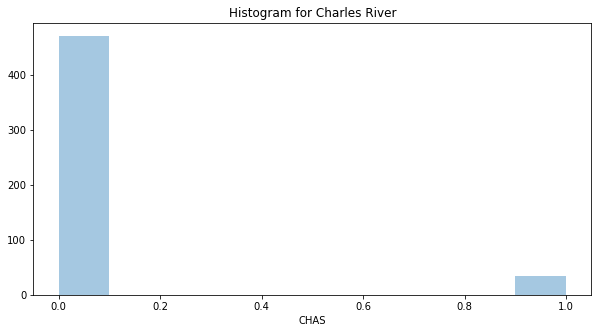

In [4]:
# Histogram for Charles River
plt.figure(figsize = (10,5))
sns.distplot(a = boston_df.CHAS,bins=10, kde=False)
plt.title('Histogram for Charles River')
plt.show()

**Charles River Note:** A vast majority of the tracts are not bound to the Charles River

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [5]:
# Median Value of Owner-Occupied Homes v. Age
# Age buckets are: 35 years old and younger; Between 35 and 70 years old; and 70 years old and older
# This is just to setup the data prior to visualizing it in a boxplot
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 Years and Younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35-70 Years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 Years and Older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35-70 Years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 Years and Older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35-70 Years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35-70 Years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35-70 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,35-70 Years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 Years and Older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 Years and Older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 Years and Older


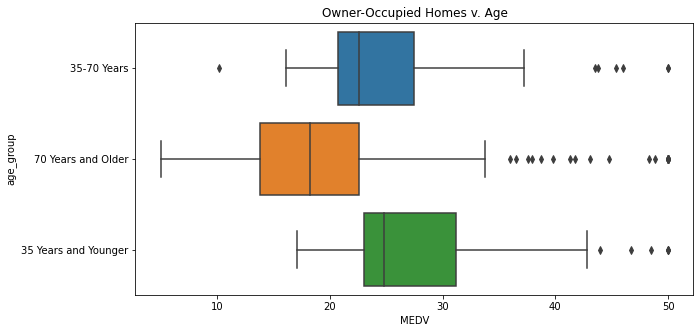

In [6]:
# Median Value of Owner-Occupied Homes v. Age boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x = boston_df.MEDV, y = boston_df.age_group, data = boston_df)
plt.title('Owner-Occupied Homes v. Age')
plt.show()

**Owner Occupied Homes v. Age Note:** The older the home, by age group, the lower the median value of the owner-occupied home

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

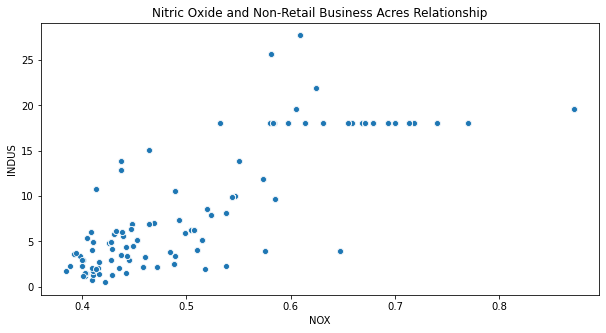

In [7]:
# Nitric Oxide Concentration and Proportion of Non-Retail Business Acres per Town relationship scatterplot
plt.figure(figsize = (10,5))
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS, data = boston_df)
plt.title('Nitric Oxide and Non-Retail Business Acres Relationship')
plt.show()

**Nitric Oxide and Non-Retail Business Acres Note:** Up to the intersection of 0.6 pptm Nitric Oxide and 18 Non-Retail Business Acres, there appears to be a linear relationship.

### Create a histogram for the pupil to teacher ratio variable

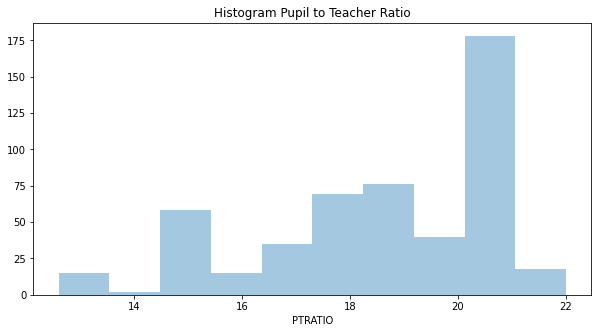

In [8]:
# Pupil to Teacher Ratio histogram
plt.figure(figsize = (10,5))
sns.distplot(a=boston_df.PTRATIO, bins = 10, kde = False)
plt.title('Histogram Pupil to Teacher Ratio')
plt.show()

**Pupil to Teacher Ratio Note:** A pupil to Teacher ratio of 21 was the most predominant. Pupil to teacher ratio of 14 had the fewest occurrances.

## Hypothesis Testing (Task 5 - Use Appropriate Tests to Answer Questions

### Is there a significant difference in Median Value of Homes bounded by the Charles River or not? (T-test for independent samples)

>$H_0$: Median Value of Homes **ARE** the same <br>
>$H_1$: Median Value of Homes **ARE NOT** the same

In [9]:
# Create Variable a
a = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Create Variable b
b = boston_df[boston_df['CHAS'] == 1]['MEDV']

# t-Test Calculationb
scipy.stats.ttest_ind(a, b, axis = 0, equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value = 7.390623170519905e-05 is less than an α = 0.05. we reject the null hypothesis because the results are statistically significant

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

>$H_0$: The means for for the Age Groups **ARE** the same <br>
>$H_1$: **AT LEAST ONE** mean differs

In [10]:
# Creae Age Group buckets for Age of homes
# Age buckets are: 35 years old and younger; Between 35 and 70 years old; and 70 years old and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 Years and Younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '35-70 Years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 Years and Older'

# Create evaluation variables of Age buckets
le_35_eval = boston_df[boston_df['age_group'] == '35 Years and Younger']['MEDV']
bt_35_70_eval = boston_df[boston_df['age_group'] == '35-70 Years']['MEDV']
ge_70_eval = boston_df[boston_df['age_group'] == '70 Years and Older']['MEDV']

# ANOVA calculation
f_statistic, p_value = scipy.stats.f_oneway(le_35_eval, bt_35_70_eval, ge_70_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value = 1.7105011022702984e-15 is less than an α = 0.05. we reject the null hypothesis because the results are statistically significant

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

>$H_0$: Nitric Oxide Concentration **IS NOT** correlated to Non-Retail Business Acres per Town<br>
>$H_1$: Nitric Oxide Concentration **IS** correlated to Non-Retail Business Acres per Town

In [11]:
# Pearson Correlation calculation
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value = 7.913361061239593e-98 is less than an α = 0.05. we reject the null hypothesis and conclude that a correlation does exist

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

>$H_0$: Weighted distance to the five Boston Unemployment Centers **ARE NOT** related to the Median Value of Owner-Occupied Homes<br>
>$H_1$: Weighted distance to the five Boston Unemployment Centers **ARE** related to the Median Value of Owner-Occupied Homes

In [12]:
# Create Variable y for the target/dependent variable
y = boston_df['MEDV']

# Create Variable x for the indepdendent variable
x = boston_df['DIS']

# Add an intercept (Beta 0) to the model
x = sm.add_constant(x)

# Regression calculation for correlation
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Print out the statistics of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        20:02:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Calculate Correlation Coefficient from the Variance (R-Squared) value
np.sqrt(0.062)

0.24899799195977465

**Conclusion:** Since the p-value = 0.000 is less than an α = 0.05. we reject the null hypothesis and conclude that there is no relationship. A Correlation Coefficent = 0.25 supports this conclusion.